## RL
In this project, you'll train two kinds of RL agents (DQN and CFR) on No-limit Texas Holdem Poker and a simpler version of poker called le-duc holdem. We'll primarily use a nice library called rlcard.

https://github.com/datamllab/rlcard/tree/master

This project is less about understanding the inner mechanisms of these RL algorithms (though we're happy to chat about that if you guys have questions) and more about working on your programming skills. Can you get a hang of an unfamiliar library to build something cool? You should spend a little bit of time reading through the repo before attempting the project.

In [ ]:
!pip3 install rlcard[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.0/269.0 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.2 MB/s eta 0:00:00
  Created wheel for rlcard: filename=rlcard-1.2.0-py3-none-any.whl size=325795 sha256=522336b5289ad387e2b9c4eeffeb41c228d11162850d3438066978a27feca14a
  Stored in directory: /root/.cache/pip/wheels/a5/0a/39/26d73b035027276e526bec94b0217ed799109d7890c34a7d9b
Successfully built rlcard


In [ ]:
import torch
import numpy as np
import pandas as pd

Le-Duc Hold Em

In [ ]:
import rlcard
from rlcard import models
from rlcard.agents import LeducholdemHumanAgent as HumanAgent
from rlcard.utils import print_card

# Make environment
env = rlcard.make('leduc-holdem')
human_agent = HumanAgent(env.num_actions)
cfr_agent = models.load('leduc-holdem-cfr').agents[0]
env.set_agents([
    human_agent,
    cfr_agent,
])

print(">> Leduc Hold'em pre-trained model")

while (True):
    print(">> Start a new game")

    trajectories, payoffs = env.run(is_training=False)

    # If the human does not take the final action, we need to
    # print other players action

    final_state = trajectories[0][-1]
    action_record = final_state['action_record']
    state = final_state['raw_obs']
    _action_list = []
    for i in range(1, len(action_record)+1):
        if action_record[-i][0] == state['current_player']:
            break
        _action_list.insert(0, action_record[-i])
    for pair in _action_list:
        print('>> Player', pair[0], 'chooses', pair[1])

    # Let's take a look at what the agent card is
    print('===============     CFR Agent    ===============')
    print_card(env.get_perfect_information()['hand_cards'][1])

    print('===============     Result     ===============')
    if payoffs[0] > 0:
        print('You win {} chips!'.format(payoffs[0]))
    elif payoffs[0] == 0:
        print('It is a tie.')
    else:
        print('You lose {} chips!'.format(-payoffs[0]))
    print('')

    input("Press any key to continue...")

>> Leduc Hold'em pre-trained model
>> Start a new game

=============== Community Card ===============
┌─────────┐
│░░░░░░░░░│
│░░░░░░░░░│
│░░░░░░░░░│
│░░░░░░░░░│
│░░░░░░░░░│
│░░░░░░░░░│
│░░░░░░░░░│
└─────────┘
===============   Your Hand    ===============
┌─────────┐
│K        │
│         │
│         │
│    ♠    │
│         │
│         │
│        K│
└─────────┘
===============     Chips      ===============
Yours:   +
Agent 1: ++
=========== Actions You Can Choose ===========
0: call, 1: raise, 2: fold

>> You choose action (integer): 1
>> Player 1 chooses call

=============== Community Card ===============
┌─────────┐
│K        │
│         │
│         │
│    ♥    │
│         │
│         │
│        K│
└─────────┘
===============   Your Hand    ===============
┌─────────┐
│K        │
│         │
│         │
│    ♠    │
│         │
│         │
│        K│
└─────────┘
===============     Chips      ===============
Yours:   ++++
Agent 1: ++++
=========== Actions You Can Choose =========

ValueError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

MessageError: ignored

Iteration 0
----------------------------------------
  episode      |  0
  reward       |  1.6035
----------------------------------------
INFO - Step 100, rl-loss: 1905.4951171875
INFO - Copied model parameters to target network.
Iteration 100
----------------------------------------
  episode      |  100
  reward       |  1.923
----------------------------------------
Iteration 200
----------------------------------------
  episode      |  200
  reward       |  2.122
----------------------------------------
Iteration 300
----------------------------------------
  episode      |  300
  reward       |  -1.3095
----------------------------------------
Iteration 400
----------------------------------------
  episode      |  400
  reward       |  -0.548
----------------------------------------
INFO - Step 499, rl-loss: 1619.1812744140625
INFO - Saved model checkpoint.
Iteration 500
----------------------------------------
  episode      |  500
  reward       |  2.651
---------------------

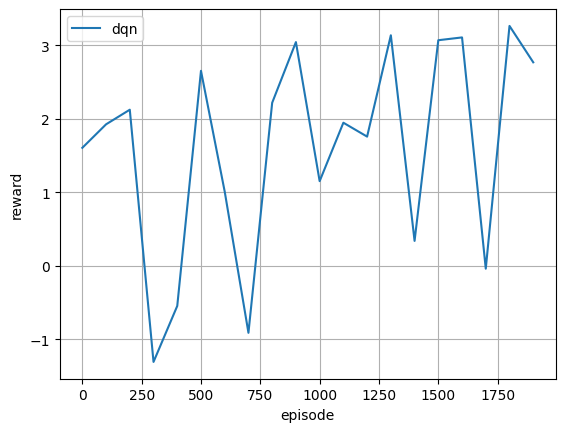

In [ ]:
import os
import argparse

import rlcard
from rlcard.agents import (
    CFRAgent,
    RandomAgent,
    DQNAgent
)
from rlcard.utils import (
    set_seed,
    tournament,
    Logger,
    plot_curve,
    reorganize,
)

def train(agent_type, game_type = 'leduc-holdem', seed = 42, num_episodes = 5000, evaluate_every = 100, num_eval_games = 2000, log_dir = "cfr/"):
   #TODO
    """
    train takes in a RL algorithm (DQN or CFR), a poker game type (leduc-holdem or no-limit-holdem), and other hyperparameters
    to train an agent and saves the agent and performance metrics

    Referring to this doc will be helpful: https://github.com/datamllab/rlcard/blob/master/docs/toy-examples.md
    """

    env = rlcard.make(
        game_type,
        config={
            'seed': 0,
            'allow_step_back': True,
        }
    )

    eval_env = rlcard.make(
        game_type,
        config={
            'seed': 0,
        }
    )
    set_seed(seed)

    if agent_type == "cfr":
      agent = CFRAgent(
          env,
          os.path.join(
              log_dir,
              'cfr_model',
          ),
      )

      agent.load()
    elif agent_type == "dqn":
    agent = DQNAgent(
          num_actions=env.num_actions,
          state_shape=env.state_shape[0],
          mlp_layers=[64,64],
          save_path = log_dir,
          save_every = num_episodes / 5,
      )

      env.set_agents([agent, agent])

    eval_env.set_agents([
        agent,
        RandomAgent(num_actions=env.num_actions),
    ])

    with Logger(log_dir) as logger:
        for episode in range(num_episodes):
            if agent_type == "cfr":
              agent.train()
            elif agent_type == "dqn":
              trajectories, payoffs = env.run(is_training=True)

              # Reorganaize the data to be state, action, reward, next_state, done
              trajectories = reorganize(trajectories, payoffs)

              # Feed transitions into agent memory, and train the agent
              for ts in trajectories[0]:
                  agent.feed(ts)

            print('\rIteration {}'.format(episode), end='')
            # Evaluate the performance. Play with Random agents.
            if episode % evaluate_every == 0:
                if agent_type == "cfr":
                  agent.save() # Save model

                logger.log_performance(
                    episode,
                    tournament(
                        eval_env,
                        num_eval_games
                    )[0]
                )

        # Get the paths
        csv_path, fig_path = logger.csv_path, logger.fig_path
    # Plot the learning curve
    plot_curve(csv_path, fig_path, agent_type)


agent_type = "dqn"
game_type = "no-limit-holdem"
train(agent_type, game_type = game_type, num_episodes = 2000, log_dir = agent_type + "-" + game_type + "/")

In [ ]:
#the tournament method from rlcard takes in an environment with agents and plays the agents against each other
#write code that plays two of the agents you've trained (ie random agent vs dqn or dqn vs cfr) against each other
#to see how well they do


eval_env = rlcard.make(
    'leduc-holdem',
    config={
        'seed': 0,
    }
)

pretrained_agent = models.load('leduc-holdem-cfr').agents[0]

our_dqn_agent = DQNAgent(
          num_actions=eval_env.num_actions,
          state_shape=eval_env.state_shape[0],
          mlp_layers=[64,64],
          save_path = "dqn/",
          )

checkpoint = torch.load("dqn/checkpoint_dqn.pt")
our_dqn_agent.from_checkpoint(checkpoint)

our_cfr_agent = CFRAgent(
    eval_env,
    os.path.join(
        "cfr/",
        'cfr_model',
    ),
)

our_cfr_agent.load()

eval_env.set_agents([
    our_dqn_agent,
    our_cfr_agent,
])

out = tournament(eval_env, 1000)
print(out)

FileNotFoundError: ignored

Play No-Limit Texas Hold-em against your AI

In [ ]:
import rlcard
from rlcard import models
from rlcard.agents import NolimitholdemHumanAgent
from rlcard.utils import print_card

# Make environment
env = rlcard.make('no-limit-holdem')

human_agent = NolimitholdemHumanAgent(env.num_actions)

our_dqn_agent = DQNAgent(
          num_actions=env.num_actions,
          state_shape=env.state_shape[0],
          mlp_layers=[64,64],
          save_path = "dqn/",
          )

checkpoint = torch.load("dqn-no-limit-holdem/checkpoint_dqn.pt")
our_dqn_agent.from_checkpoint(checkpoint)

# cfr_agent = models.load('leduc-holdem-cfr').agents[0]
env.set_agents([
    our_dqn_agent,
    human_agent,
])

print(">> Play No-Limit Texas Holdem against a random agent")

while (True):
    print(">> Start a new game")

    trajectories, payoffs = env.run(is_training=False)

    print(trajectories)
    final_stae = trajectories[0][-1]
    action_record = final_stae['action_record']
    state = final_stae['raw_obs']
    _action_list = []
    for i in range(1, len(action_record)+1):
        if action_record[-i][0] == state['current_player']:
            break
        _action_list.insert(0, action_record[-i])
    for pair in _action_list:
        print('>> Player', pair[0], 'chooses', pair[1])

    # Let's take a look at what the agent card is
    print('===============     DQN Agent    ===============')
    print_card(env.get_perfect_information()['hand_cards'][0])

    print('===============     Result     ===============')
    if payoffs[0] > 0:
        print('You win {} chips!'.format(payoffs[0]))
    elif payoffs[0] == 0:
        print('It is a tie.')
    else:
        print('You lose {} chips!'.format(-payoffs[0]))
    print('')

    input("Press any key to continue...")